### Some Theory

##### Types of data used for I/O:
- Text - '12345' as a sequence of unicode chars
- Binary - 12345 as a sequence of bytes of its binary equivalent

##### Hence there are 2 file types to deal with
- Text files - All program files are text files
- Binary Files - Images,music,video,exe files

### How File I/O is done in most programming languages

- Open a file
- Read/Write data
- Close the file

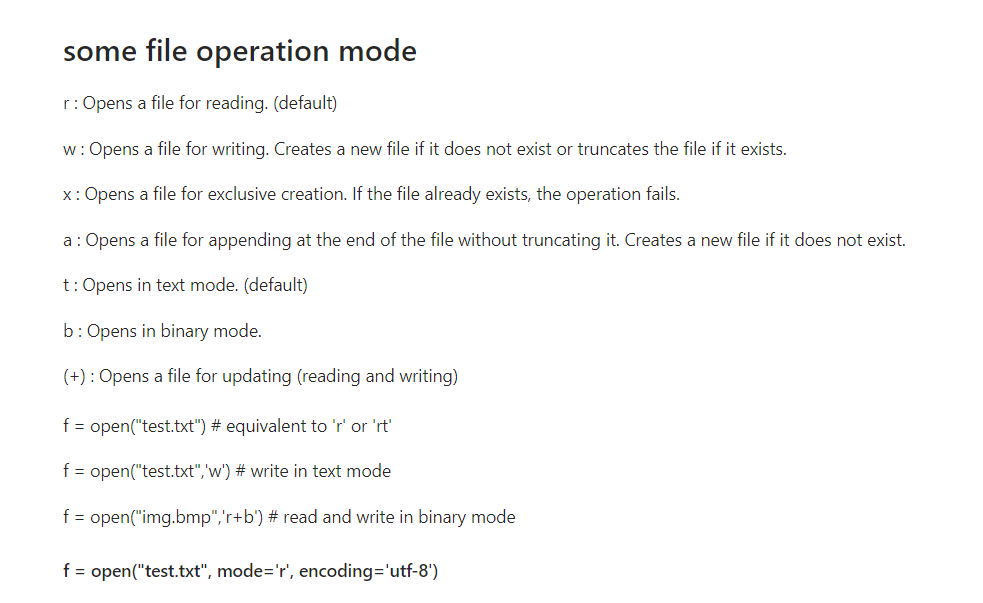

## Writing to a file

In [1]:
# file.writable()
# file.write()
# file.write_through()
# file.writelines()


# Case 1 -- If the file is not present

file = open(file="all files/sample.txt", mode="w")

file.write("Hello, world")

# It will return true or false
print(file.writable())

file.close()

True


In [2]:
# After close if I want to write something on the file it will throw error

file.write("Alamin")

ValueError: I/O operation on closed file.

In [3]:
# write multiline strings

f = open(file='all files/sample1.txt', mode='w')

f.write('hello world')

f.write('\nhow are you?')

f.close()

In [4]:
# case 2 - if the file is already present

f = open(file='all files/sample.txt', mode='w')

f.write('salman khan')

f.close()

In [5]:
# Problem with w mode. This is remove previous string from the file.

# introducing append mode

f = open(file='all files/sample1.txt', mode='a')
f.write('\nI am fine')
f.close()

In [6]:
# write lines

L = ['hello\n','hi\n','how are you\n','I am fine']

f = open(file='all files/sample.txt', mode='w')

f.writelines(L)

f.close()

## Reading files

In [10]:
# reading from files

# -> using read()

f = open(file='all files/sample.txt', mode='r')

s = f.read()

print(s)

print(f.readable()) # it will return true or false if the file is readable

f.close()

hello
hi
how are you
I am fine
True


In [11]:
# reading upto n chars

f = open(file='all files/sample.txt', mode='r')

s = f.read(10)

print(s)

f.close()

hello
hi
h


In [12]:
# readline() -> to read line by line

f = open(file='all files/sample.txt', mode='r')
# readline() create an new line and print() also creat a new line so we use end=""
print(f.readline(),end='')
print(f.readline(),end='')
f.close()

hello
hi


In [18]:
# readline() -> to read line by line

f = open(file='all files/sample.txt', mode='r')
# we can also read some char for a particular line
print(f.readline(3))
f.close()

hel


In [13]:
# reading entire text file using readline

f = open(file='all files/sample.txt', mode='r')

while True:
    data = f.readline()
    
    if data == '':
        break
    else:
        print(data, end='')

f.close()

hello
hi
how are you
I am fine

### Using Context Manager (With)

- It's a good idea to close a file after usage as it will free up the resources
- If we dont close it, garbage collector would close it
- with keyword closes the file as soon as the usage is over

In [19]:
# with

with open(file='all files/sample1.txt', mode='w') as f:
    f.write('Alamin bhuyan')

In [20]:
f.write("After close the file")

ValueError: I/O operation on closed file.

In [21]:
# Read file using with keyword

with open(file="all files/sample.txt", mode="r") as f:
    print(f.readline())

hello



In [22]:
# moving within a file -> 10 char then 10 char

with open(file="all files/sample.txt", mode="r") as f:
    print(f.read(10))
    print(f.read(10))
    print(f.read(10))
    print(f.read(10))

hello
hi
h
ow are you

I am fine



In [24]:
# benefit? -> to load a big file in memory

big_L = ['hello world ' for i in range(1000)]

with open(file="all files/big.txt", mode='w') as f:
    f.writelines(big_L)

In [25]:
with open(file="all files/big.txt", mode='r') as f:

    chunk_size = 100
    
    print(len(f.read(chunk_size)))
    
    print("*" * 30)

    while len(f.read(chunk_size)) > 0:
        print(f.read(chunk_size),end='***')
        f.read(chunk_size)

100
******************************
rld hello world hello world hello world hello world hello world hello world hello world hello world ***rld hello world hello world hello world hello world hello world hello world hello world hello world ***rld hello world hello world hello world hello world hello world hello world hello world hello world ***rld hello world hello world hello world hello world hello world hello world hello world hello world ***rld hello world hello world hello world hello world hello world hello world hello world hello world ***rld hello world hello world hello world hello world hello world hello world hello world hello world ***rld hello world hello world hello world hello world hello world hello world hello world hello world ***rld hello world hello world hello world hello world hello world hello world hello world hello world ***rld hello world hello world hello world hello world hello world hello world hello world hello world ***rld hello world hello world hello worl

`We can change our current file cursor (position) using the seek() method. Similarly, the tell() method returns our current position (in number of bytes).`

In [29]:
# seek and tell function

with open(file="all files/sample.txt", mode='r') as f:
#     f.seek(10)
    print(f.read(10))
    print(f.tell())
    
    f.seek(0)
    print(f.read(10))
    print(f.tell())

hello
hi
h
12
hello
hi
h
12


In [30]:
# seek during write
with open(file="all files/sample.txt", mode='w') as f:
    f.write('Hello')
    f.seek(0)
    f.write('Xa')

### Problems with working in text mode

- can't work with binary files like images
- not good for other data types like int/float/list/tuples

In [31]:
# working with binary file
# We can't read binary file

with open(file="img/Screenshot_1.jpg", mode='r') as f:
    f.read()

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 251: character maps to <undefined>

In [32]:
# working with binary file

# here we reading a binary file and writing on another file

with open(file="img/Screenshot_1.jpg", mode='rb') as rf:
    with open(file="img/new.jpg", mode='wb') as wf:
        wf.write(rf.read())

In [33]:
# working with other data types
with open(file="all files/sample.txt", mode='w') as f:
    f.write(5)

TypeError: write() argument must be str, not int

In [34]:
# more complex data

# If we write dict in string format it will write but we can't back it as a dict when we will try to read

d = {
    'name':'Alamin',
     'age':22,
     'gender':'male'
}

with open(file="all files/sample.txt", mode='w') as f:
    f.write(str(d))

In [35]:
# If we try to convert in dict

with open(file="all files/sample.txt", mode='r') as f:
    print(dict(f.read()))

ValueError: dictionary update sequence element #0 has length 1; 2 is required

### Serialization and Deserialization

- **Serialization** - process of converting python data types to JSON format
- **Deserialization** - process of converting JSON to python data types

#### What is JSON?


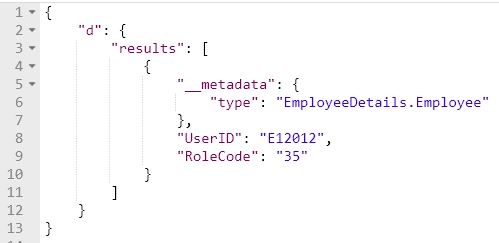

`JSON = JavaScript Object Notation`

In [36]:
import json

In [37]:
# serialization using json module

# list

L = [1,2,3,4]

with open(file="all files/demo.json", mode='w') as f:
    json.dump(L, f)

In [38]:
# dict

d = {
    'name':'Alamin',
     'age':22,
     'gender':'male'
}

with open(file="all files/demo2.json", mode='w') as f:
    json.dump(d, f, indent=4) # indent=4 for batter representation

In [39]:
# deserialization

with open(file="all files/demo.json", mode='r') as f:
    d = json.load(f)
    print(d)
    print(type(d))

[1, 2, 3, 4]
<class 'list'>


In [41]:
with open(file="all files/demo2.json", mode='r') as f:
    d = json.load(f)
    print(d)
    print(type(d))

{'name': 'Alamin', 'age': 22, 'gender': 'male'}
<class 'dict'>


In [42]:
# serialize and deserialize tuple

t = (1,2,3,4,5)

with open(file="all files/demo3.json", mode='w') as f:
    json.dump(t, f)

In [44]:
# If we write tuple it will convert as list aumatically

with open(file="all files/demo3.json", mode="r") as f:
    d = json.load(f)
    print(d)
    print(type(d))

[1, 2, 3, 4, 5]
<class 'list'>


In [45]:
# serialize and deserialize a dict of list

d = {
    'student':'nitish',
     'marks':[23,14,34,45,56]
}

with open(file="all files/demo3.json", mode="w") as f:
    df = json.dump(d, f, indent=4)

In [46]:
with open(file="all files/demo3.json", mode="r") as f:
    file = json.load(f)
    print(file)

{'student': 'nitish', 'marks': [23, 14, 34, 45, 56]}


## Serializing and Deserializing custom objects

In [47]:
class Person:
    def __init__(self, fname, lname, age, gender):
        self.fname = fname
        self.lname = lname
        self.age = age
        self.gender = gender

# format to printed in

# -> Alamin Bhuyan age -> 33 gender -> male

In [48]:
person = Person('Alamin', 'Bhuyan', 33, 'male')

In [49]:
# We can't dump custom objects directly

with open(file="all files/demo5.json", mode="w") as f:
    df = json.dump(obj=person, fp=f)

TypeError: Object of type Person is not JSON serializable

In [53]:
# This the way we can dump. We have to tell how will be our object write like this

def show_object(obj):
    if isinstance(obj, Person):
        return f"{obj.fname} {obj.lname} age -> {obj.age} gender -> {obj.gender}"

    
with open(file="all files/demo5.json", mode="w") as f:
    df = json.dump(obj=person, fp=f, default=show_object, indent=4)

In [54]:
def show_object(obj):
    if isinstance(obj, Person):
        return {'name':obj.fname + ' ' + obj.lname,'age':obj.age,'gender':obj.gender}

    
with open(file="all files/demo6.json", mode="w") as f:
    df = json.dump(obj=person, fp=f, default=show_object, indent=4)

In [55]:
# deserializing

with open(file="all files/demo6.json", mode="r") as f:
    file = json.load(f)
    print(file)
    print(type(file))

{'name': 'Alamin Bhuyan', 'age': 33, 'gender': 'male'}
<class 'dict'>


### Pickling
`Pickling` is the process whereby a Python object hierarchy is converted into a byte stream, and `unpickling` is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

In [56]:
class Person:
    def __init__(self, name:str, age:int):
        self.name = name
        self.age = age
        
    def display_info(self):
        print('Hi my name is',self.name,'and I am ',self.age,'years old')

In [57]:
p = Person('Alamin', 33)

In [58]:
import pickle

In [59]:
# pickle dump

with open(file="all files/demo.pkl", mode="wb") as f:
    pickle.dump(obj=p, file=f)

In [60]:
# pickle load

with open(file="all files/demo.pkl", mode="rb") as f:
    myobj = pickle.load(file=f)

In [61]:
myobj.display_info()

Hi my name is Alamin and I am  33 years old


### Pickle Vs Json

- Pickle lets the user to store data in binary format. JSON lets the user store data in a human-readable text format.